<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#model-restructure" data-toc-modified-id="model-restructure-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>model restructure</a></span></li><li><span><a href="#analytical-solution-deduction" data-toc-modified-id="analytical-solution-deduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>analytical solution deduction</a></span></li><li><span><a href="#integration-trial" data-toc-modified-id="integration-trial-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>integration trial</a></span></li></ul></div>

# model restructure

In [1]:
import scipy as sc
import scipy.integrate as itg
import matplotlib.pylab as plt
import sympy as sp
sp.init_printing()

In [2]:
def cpb(Den,t,x,ePR,eP,gP,aP,eBR,eB,gB,mB):
    ## variable sorting
    C = Den[0]
    P = Den[1]
    B = Den[2]
    
    ## rate calculation
    dC = gP*ePR*(1-eP)*P + aP*P**2 + gB*(eBR*(1-eB)-1)*C*B + mB*B -x*C
    dP = gP*ePR*eP*P - aP*P**2 - x*P
    dB = gB*eBR*eB*C*B - mB*B - x*B
    
    return(sc.array([dC,dP,dB]))

In [3]:
C,P,B, x, e_PR,e_P,g_P,a_P, e_BR,e_B,g_B,m_B = sp.var('C,P,B, x, e_PR,e_P,g_P,a_P, e_BR,e_B,g_B,m_B', positive=True)
dC = g_P*e_PR*(1-e_P)*P + a_P*P**2 + g_B*(e_BR*(1-e_B)-1)*C*B + m_B*B -x*C
dP = g_P*e_PR*e_P*P - a_P*P**2 - x*P
dB = g_B*e_BR*e_B*C*B - m_B*B - x*B

# analytical solution deduction

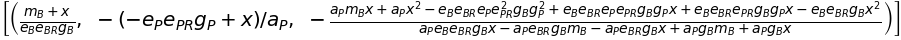

In [4]:
sOl = sp.solve([sp.Eq(dC,0),sp.Eq(dP,0),sp.Eq(dB,0)],[C,P,B]);sOl

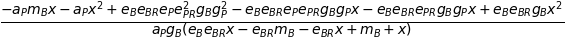

In [5]:
sp.simplify(sOl[0][2])

In [6]:
vAr = (.1,.875,.63,.259,.1,.6,.55,.1,.14)
x = vAr[0]
ePR = vAr[1]; eP = vAr[2]; gP = vAr[3]; aP = vAr[4]
eBR = vAr[5]; eB = vAr[6]; gB = vAr[7]; mB = vAr[8]
eQ = sc.array([(mB+x)/(eB*eBR*gB),(eP*ePR*gP-x)/aP,(eBR*eB*gB*(x*(x-ePR*gP*(eP+1))+eP*(ePR*gP)**2)-aP*x*(mB+x))/(aP*gB*(eBR*(x*(eB-1)-mB)+mB+x))])
eQ

array([ 7.27272727,  0.4277375 , -1.7219105 ])

# integration trial

In [7]:
t = sc.linspace(0,15,1000)
den, infodict = itg.odeint(cpb, sc.array([.0000001,.0000001,.0000001]), t, full_output=True, args=vAr)

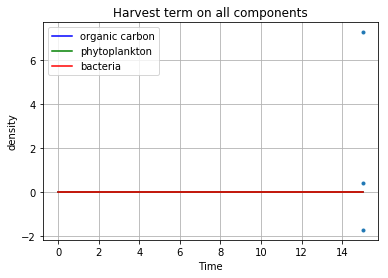

In [8]:
f1 = plt.figure()
plt.plot(t,den[:,0], 'b-', label='organic carbon')
plt.plot(t,den[:,1], 'g-', label='phytoplankton')
plt.plot(t,den[:,2], 'r-', label='bacteria')
plt.plot([t[len(t)-1],t[len(t)-1],t[len(t)-1]],eQ, '.')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('density')
plt.title('Harvest term on all components')
plt.show()